<a href="https://colab.research.google.com/github/CharlesColgan/MSDS-6350-6373-CODE/blob/master/hw3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading
BITSTREAMVERA = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/BITSTREAMVERA.csv")

CENTURY = pd.read_csv('https://raw.githubusercontent.com/sul01/MSDS-CODE/master/hw3/CENTURY.csv')

CONSOLAS = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/CONSOLAS.csv")

EBRIMA = pd.read_csv("https://raw.githubusercontent.com/CharlesColgan/MSDS-6350-6373-CODE/master/hw2/EBRIMA.csv")

GILL = pd.read_csv('https://raw.githubusercontent.com/sul01/MSDS-CODE/master/hw3/GILL.csv')

#cleaning
drop_names = ["fontVariant", "m_label","orientation", "m_top", "m_left", "originalH" ,"originalW", "h", "w"]

FONT = [BITSTREAMVERA, CENTURY, CONSOLAS, EBRIMA, GILL]; CL = []

for i in range(5):

  CL.append(FONT[i][(FONT[i]['strength'] == 0.4) & (FONT[i]['italic'] == 0)].drop(drop_names, axis = 1))

#transforming
def fontToMatrix(font, df):

  for case in range(df.shape[0]):

    font[case] =  np.array(df[df.columns[3:]].iloc[case]).reshape(20,20)

FONT_mat = [] #font as 20x20 matrix

for i in range(5):

  FONT_mat.append(np.empty((CL[i].shape[0], 20, 20), int))

  fontToMatrix(FONT_mat[i], CL[i])

Examples

Bitstream



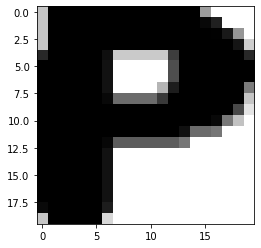

Century



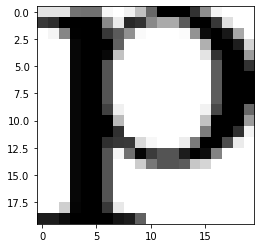

Consolas



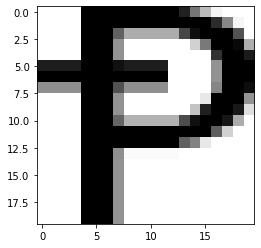

Ebrima



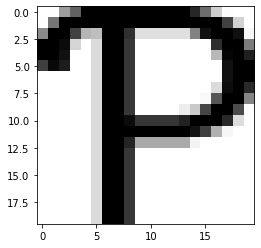

Gill



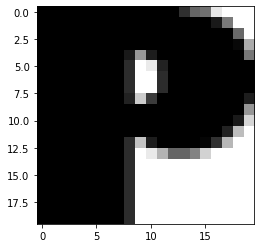

In [6]:
print('Bitstream\n'); plt.imshow(FONT_mat[0][8], cmap=plt.cm.binary); plt.show() 

print('Century\n'); plt.imshow(FONT_mat[1][199], cmap=plt.cm.binary); plt.show() 

print('Consolas\n'); plt.imshow(FONT_mat[2][26], cmap=plt.cm.binary); plt.show() 

print('Ebrima\n'); plt.imshow(FONT_mat[3][1387], cmap=plt.cm.binary); plt.show() 

print('Gill\n'); plt.imshow(FONT_mat[4][243], cmap=plt.cm.binary); plt.show() 

train/test split

In [7]:
from sklearn.model_selection import train_test_split

def ypred(x, model):

  return list(map({0:'BITSTREAMVERA', 1:'CENTURY', 2:'CONSOLAS', 3:'EBRIMA', 4:'GILL'}.get, model.predict(x).argmax(axis = -1)))

dataX = np.concatenate(([FONT_mat[i] for i in range(5)])).reshape(-1, 20, 20, 1)

dataY = np.concatenate(([CL[i]['font'] for i in range(5)]))

train, test = train_test_split(range(dataX.shape[0]), test_size = 0.2, random_state = 0)

x_train = dataX[train]; x_test = dataX[test]

y_train = dataY[train]; y_test = dataY[test]

#CNN

(https://www.tensorflow.org/tutorials/images/cnn)

h=200

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

#build (step 3)

model = models.Sequential()

model.add(layers.Conv2D(16, (5, 5), activation = 'relu', input_shape = (20, 20, 1)))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Flatten())

model.add(layers.Dense(200, activation = 'relu')) 

model.add(layers.Dropout(0.5))

model.add(layers.Dense(5, activation = 'softmax'))
#model.summary()

checkpointer = ModelCheckpoint('modelh_200', monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

monitor = model.fit(x_train, tf.one_hot(pd.Series(y_train,dtype = 'category').astype('category').cat.codes,5), epochs = 100, batch_size= int(len(train)**0.5),
                    validation_data = (x_test, tf.one_hot(pd.Series(y_test, dtype = 'category').astype('category').cat.codes,5)), callbacks = [checkpointer])

Epoch 1/100
89/89 [==============================] - 3s 23ms/step - loss: 12.6765 - accuracy: 0.2492 - val_loss: 1.5679 - val_accuracy: 0.2832
INFO:tensorflow:Assets written to: modelh_200/assets
Epoch 2/100
89/89 [==============================] - 2s 21ms/step - loss: 1.5953 - accuracy: 0.3049 - val_loss: 1.5183 - val_accuracy: 0.3200
INFO:tensorflow:Assets written to: modelh_200/assets
Epoch 3/100
89/89 [==============================] - 2s 21ms/step - loss: 1.5273 - accuracy: 0.3379 - val_loss: 1.4690 - val_accuracy: 0.3605
INFO:tensorflow:Assets written to: modelh_200/assets
Epoch 4/100
89/89 [==============================] - 2s 21ms/step - loss: 1.4773 - accuracy: 0.3703 - val_loss: 1.4341 - val_accuracy: 0.3748
INFO:tensorflow:Assets written to: modelh_200/assets
Epoch 5/100
89/89 [==============================] - 2s 21ms/step - loss: 1.4149 - accuracy: 0.4023 - val_loss: 1.3881 - val_accuracy: 0.4101
INFO:tensorflow:Assets written to: modelh_200/assets
Epoch 6/100
89/89 [=====

Performance during learning

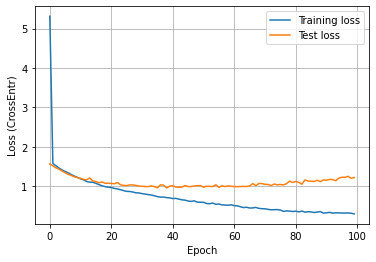

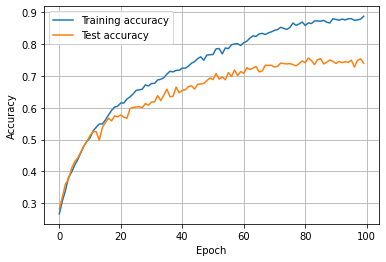

In [9]:
def plotCrssEntr(monitor):

  plt.plot(monitor.model.history.history['loss'], label = 'Training loss')

  plt.plot(monitor.model.history.history['val_loss'], label = 'Test loss')

  plt.xlabel('Epoch'); plt.ylabel('Loss (CrossEntr)')

  plt.legend(); plt.grid(True); plt.show()

def plotAcc(monitor):
  
  plt.plot(monitor.model.history.history['accuracy'], label = 'Training accuracy')

  plt.plot(monitor.model.history.history['val_accuracy'], label = 'Test accuracy')

  plt.xlabel('Epoch'); plt.ylabel('Accuracy')

  plt.legend(); plt.grid(True); plt.show()

plotCrssEntr(monitor); plotAcc(monitor)

Conf Matirx

In [10]:
def conf(actu, pred):

  y_actu = pd.Series(np.array(actu), name = 'Actual')

  y_pred = pd.Series(pred, name = 'Predicted')

  df_confusion = pd.crosstab(y_actu, y_pred)

  return df_confusion.divide(df_confusion.sum(axis = 1), axis = 0), sum(np.diag(df_confusion))/sum(np.sum(df_confusion))

trainConf, trainGlobal = conf(y_train, ypred(x_train, monitor.model))

print('Train:\n', trainConf,'\nGlobal: ', trainGlobal)

testConf, testGlobal = conf(y_test, ypred(x_test, monitor.model))

print('\nTest:\n', testConf, '\nGlobal: ', testGlobal)

Train:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.972507  0.000000  0.009704  0.001617  0.016173
CENTURY             0.001850  0.918002  0.009864  0.006165  0.064118
CONSOLAS            0.013912  0.010017  0.918753  0.004452  0.052866
EBRIMA              0.005095  0.005822  0.015284  0.943959  0.029840
GILL                0.032730  0.015504  0.017227  0.003445  0.931094 
Global:  0.9376360609553079

Test:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.870748  0.002268  0.058957  0.013605  0.054422
CENTURY             0.005305  0.822281  0.055703  0.050398  0.066313
CONSOLAS            0.053279  0.047131  0.692623  0.096311  0.110656
EBRIMA              0.028653  0.100287  0.189112  0.604585  0.077364
GILL                0.117450  0.040268  0.087248  0.080537

#Repeating everything for h = 90, 150

h=90

Epoch 1/100
89/89 [==============================] - 2s 22ms/step - loss: 13.0248 - accuracy: 0.2426 - val_loss: 1.6187 - val_accuracy: 0.2391
INFO:tensorflow:Assets written to: modelh_90/assets
Epoch 2/100
89/89 [==============================] - 2s 20ms/step - loss: 1.6450 - accuracy: 0.2615 - val_loss: 1.5880 - val_accuracy: 0.2488
INFO:tensorflow:Assets written to: modelh_90/assets
Epoch 3/100
89/89 [==============================] - 2s 21ms/step - loss: 1.5966 - accuracy: 0.2613 - val_loss: 1.5727 - val_accuracy: 0.2668
INFO:tensorflow:Assets written to: modelh_90/assets
Epoch 4/100
89/89 [==============================] - 2s 20ms/step - loss: 1.5773 - accuracy: 0.2887 - val_loss: 1.5607 - val_accuracy: 0.2734
INFO:tensorflow:Assets written to: modelh_90/assets
Epoch 5/100
89/89 [==============================] - 2s 20ms/step - loss: 1.5590 - accuracy: 0.2843 - val_loss: 1.5482 - val_accuracy: 0.2857
INFO:tensorflow:Assets written to: modelh_90/assets
Epoch 6/100
89/89 [==========

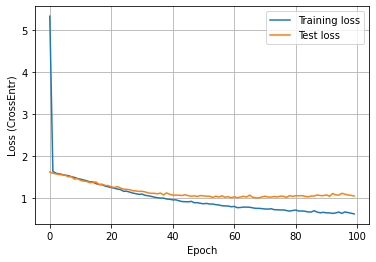

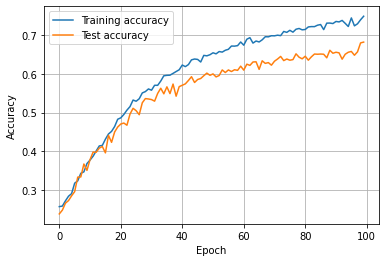

Train:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.767116  0.000539  0.010782  0.000000  0.221563
CENTURY             0.004932  0.872996  0.017263  0.008631  0.096178
CONSOLAS            0.046188  0.011130  0.823595  0.025042  0.094046
EBRIMA              0.018195  0.018195  0.085153  0.818049  0.060408
GILL                0.080103  0.012920  0.047373  0.011197  0.848407 
Global:  0.8231527724420541

Test:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.682540  0.000000  0.061224  0.002268  0.253968
CENTURY             0.010610  0.809019  0.045093  0.042440  0.092838
CONSOLAS            0.073770  0.053279  0.655738  0.096311  0.120902
EBRIMA              0.031519  0.080229  0.171920  0.607450  0.108883
GILL                0.147651  0.030201  0.104027  0.070470

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(16, (5, 5), activation = 'relu', input_shape = (20, 20, 1)))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Flatten())

model.add(layers.Dense(90, activation = 'relu')) 

model.add(layers.Dropout(0.5))

model.add(layers.Dense(5, activation = 'softmax'))

#model.summary()

checkpointer = ModelCheckpoint('modelh_90', monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

monitor = model.fit(x_train, tf.one_hot(pd.Series(y_train,dtype = 'category').astype('category').cat.codes,5), epochs = 100, batch_size = int(len(train)**0.5),
                    validation_data = (x_test, tf.one_hot(pd.Series(y_test, dtype = 'category').astype('category').cat.codes,5)), callbacks = [checkpointer])

print('h=90:\n');plotCrssEntr(monitor); plotAcc(monitor)

trainConf, trainGlobal = conf(y_train, ypred(x_train, monitor.model))

print('Train:\n', trainConf,'\nGlobal: ', trainGlobal)

testConf, testGlobal = conf(y_test, ypred(x_test, monitor.model))

print('\nTest:\n', testConf, '\nGlobal: ', testGlobal)

h=150

Epoch 1/100
89/89 [==============================] - 2s 23ms/step - loss: 12.6636 - accuracy: 0.2380 - val_loss: 1.5711 - val_accuracy: 0.2924
INFO:tensorflow:Assets written to: modelh_150/assets
Epoch 2/100
89/89 [==============================] - 2s 21ms/step - loss: 1.6032 - accuracy: 0.2900 - val_loss: 1.5385 - val_accuracy: 0.3088
INFO:tensorflow:Assets written to: modelh_150/assets
Epoch 3/100
89/89 [==============================] - 2s 20ms/step - loss: 1.5549 - accuracy: 0.3161 - val_loss: 1.5153 - val_accuracy: 0.3236
INFO:tensorflow:Assets written to: modelh_150/assets
Epoch 4/100
89/89 [==============================] - 2s 20ms/step - loss: 1.5282 - accuracy: 0.3327 - val_loss: 1.4921 - val_accuracy: 0.3574
INFO:tensorflow:Assets written to: modelh_150/assets
Epoch 5/100
89/89 [==============================] - 2s 20ms/step - loss: 1.4976 - accuracy: 0.3578 - val_loss: 1.4760 - val_accuracy: 0.3492
Epoch 6/100
89/89 [==============================] - 2s 20ms/step - loss: 1.4

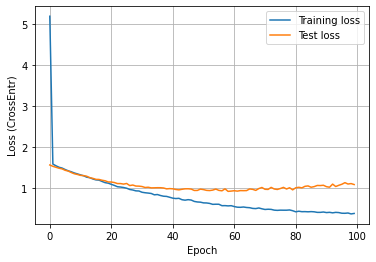

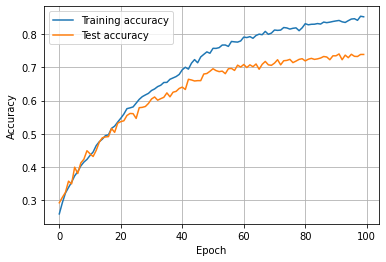

Train:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.972507  0.000539  0.011860  0.000539  0.014555
CENTURY             0.008015  0.888409  0.016646  0.008015  0.078915
CONSOLAS            0.028381  0.007791  0.885364  0.014469  0.063996
EBRIMA              0.012373  0.013828  0.065502  0.865357  0.042940
GILL                0.049957  0.009475  0.031008  0.006029  0.903531 
Global:  0.9058778332693046

Test:
 Predicted      BITSTREAMVERA   CENTURY  CONSOLAS    EBRIMA      GILL
Actual                                                              
BITSTREAMVERA       0.888889  0.009070  0.047619  0.009070  0.045351
CENTURY             0.018568  0.811671  0.034483  0.050398  0.084881
CONSOLAS            0.077869  0.032787  0.696721  0.081967  0.110656
EBRIMA              0.037249  0.083095  0.226361  0.547278  0.106017
GILL                0.087248  0.046980  0.087248  0.060403

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape = (20, 20, 1)))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))

model.add(layers.MaxPooling2D((2, 2), strides = 2))

model.add(layers.Flatten())

model.add(layers.Dense(150, activation = 'relu')) 

model.add(layers.Dropout(0.5))

model.add(layers.Dense(5, activation = 'softmax'))

#model.summary()

checkpointer = ModelCheckpoint('modelh_150', monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

monitor = model.fit(x_train, tf.one_hot(pd.Series(y_train,dtype = 'category').astype('category').cat.codes,5), epochs = 100, batch_size = int(len(train)**0.5),
                    validation_data = (x_test, tf.one_hot(pd.Series(y_test, dtype = 'category').astype('category').cat.codes,5)), callbacks = [checkpointer])

print('h=150:\n'); plotCrssEntr(monitor); plotAcc(monitor)

trainConf, trainGlobal = conf(y_train, ypred(x_train, monitor.model))

print('Train:\n', trainConf,'\nGlobal: ', trainGlobal)

testConf, testGlobal = conf(y_test, ypred(x_test, monitor.model))

print('\nTest:\n', testConf, '\nGlobal: ', testGlobal)